# Análisis Planilla del Meduca
> Puntos a evaluar:
- Fecha de ingreso a la institución
- Salarios de los funcionarios
    - Detección de anomalías
    - Tendencia salarial en la institución
- Cédulas repetidas en la planilla

## Importar librerías y crear el dataframe

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

DATA_PATH = Path().resolve() / 'analisis-planillas-gobierno/datasets/MEDUCA-10-2023.xlsx'
DATA_PATH

PosixPath('/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/data-portfolio/analisis-planillas-gobierno/datasets/MEDUCA-10-2023.xlsx')

In [2]:
meduca = pd.read_excel(DATA_PATH, skiprows=4)
meduca

Nombre   Apellido          Cédula  \
0         AARON     ABREGO   8-0778-000967   
1         AARON   CARRILLO   8-0785-002235   
2         AARON    CARRION   9-0718-000301   
3         AARON     CEDENO   1-0050-000006   
4         AARON   GONZALEZ   9-0714-000675   
...         ...        ...             ...   
59995     TANYA   PALACIOS   3-0721-000370   
59996   TANYSHA      LAKEY   8-0711-000656   
59997    TARAHY     ORTEGA   8-0749-001065   
59998   TARCILA  BOCANEGRA   7-0116-000128   
59999  TARCISIO     HAYANS  10-0027-000878   

                                                   Cargo  Salario  Gasto  \
0      EDUCADOR M 1 (PROFESOR EDUC. SEC. 2DA. CAT. TI...  1692.60      0   
1      EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1827.26      0   
2      EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...  1553.10      0   
3      EDUCADOR L 1 (SUBDIRECTOR ESC.PRIM.TIT. UNIV.E...  2058.51      0   
4      EDUCADOR F 2 (MAESTRO ESC.PRIM.TIT.UNIV LIC.ED...  1883.12      0   
...                                                  ...      ...    ...   
59995                               TRABAJADOR MANUAL  I   600.00      0   
59996  EDUCADOR F 3 (MAESTRO ESC.PRIM.TIT.UNIV PROF.E...  1750.06      0   
59997  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1719.10      0   
59998  EDUCADOR J 1 (MAESTRO ESC.PRIM.TIT.PROF EDUC.S...  1911.29      0   
59999  EDUCADOR F 1 (MAESTRO ESC.PRIM.TIT.PROF EDUC.P...  1896.00      0   

                          Estado Fecha de inicio  
0      INTERINO HASTA FIN DE AÑO      26/04/2023  
1                     PERMANENTE      20/02/2019  
2                       EVENTUAL      29/03/2019  
3                     PERMANENTE      13/02/2013  
4                     PERMANENTE      12/03/2001  
...                          ...             ...  
59995                   EVENTUAL      05/01/2023  
59996                 PERMANENTE      21/02/2013  
59997  INTERINO HASTA FIN DE AÑO      13/03/2023  
59998                 PERMANENTE      18/02/2014  
59999                 PERMANENTE      05/03/2009  

[60000 rows x 8 columns]

## Análisis fechas de ingreso - Funcionarios Meduca

In [3]:
meduca_ingresos = meduca.copy()
meduca_ingresos["Fecha de inicio"] = pd.to_datetime(meduca_ingresos["Fecha de inicio"])
meduca_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nombre           60000 non-null  object        
 1   Apellido         60000 non-null  object        
 2   Cédula           60000 non-null  object        
 3   Cargo            60000 non-null  object        
 4   Salario          60000 non-null  float64       
 5   Gasto            60000 non-null  int64         
 6   Estado           60000 non-null  object        
 7   Fecha de inicio  60000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_68802/1414222421.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  meduca_ingresos["Fecha de inicio"] = pd.to_datetime(meduca_ingresos["Fecha de inicio"])


In [4]:
meduca_ingresos.rename(columns={"Fecha de inicio":"fecha"}, inplace=True)
meduca_ingresos.head(2)

Nombre  Apellido         Cédula  \
0  AARON    ABREGO  8-0778-000967   
1  AARON  CARRILLO  8-0785-002235   

                                               Cargo  Salario  Gasto  \
0  EDUCADOR M 1 (PROFESOR EDUC. SEC. 2DA. CAT. TI...  1692.60      0   
1  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1827.26      0   

                      Estado      fecha  
0  INTERINO HASTA FIN DE AÑO 2023-04-26  
1                 PERMANENTE 2019-02-20

In [5]:
ax = meduca_ingresos['fecha'].hist(bins=40)
plt.title('Distribución de ingresos de funcionarios Anual')
plt.plot()

[]

<Axes: >

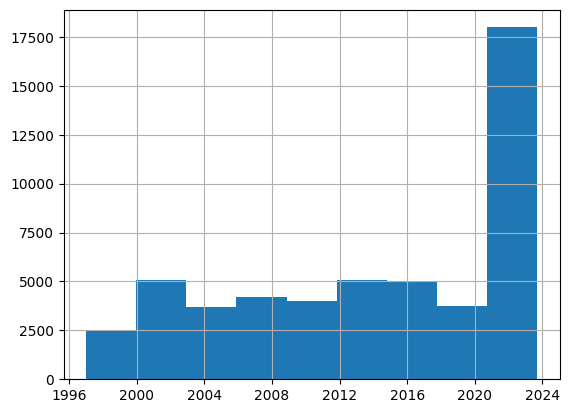

In [6]:
meduca_filtered = meduca_ingresos[meduca_ingresos['fecha'].dt.year >=1997]
meduca_filtered['fecha'].hist(bins=9)

<Axes: title={'center': 'Contrataciones by year'}, xlabel='fecha'>

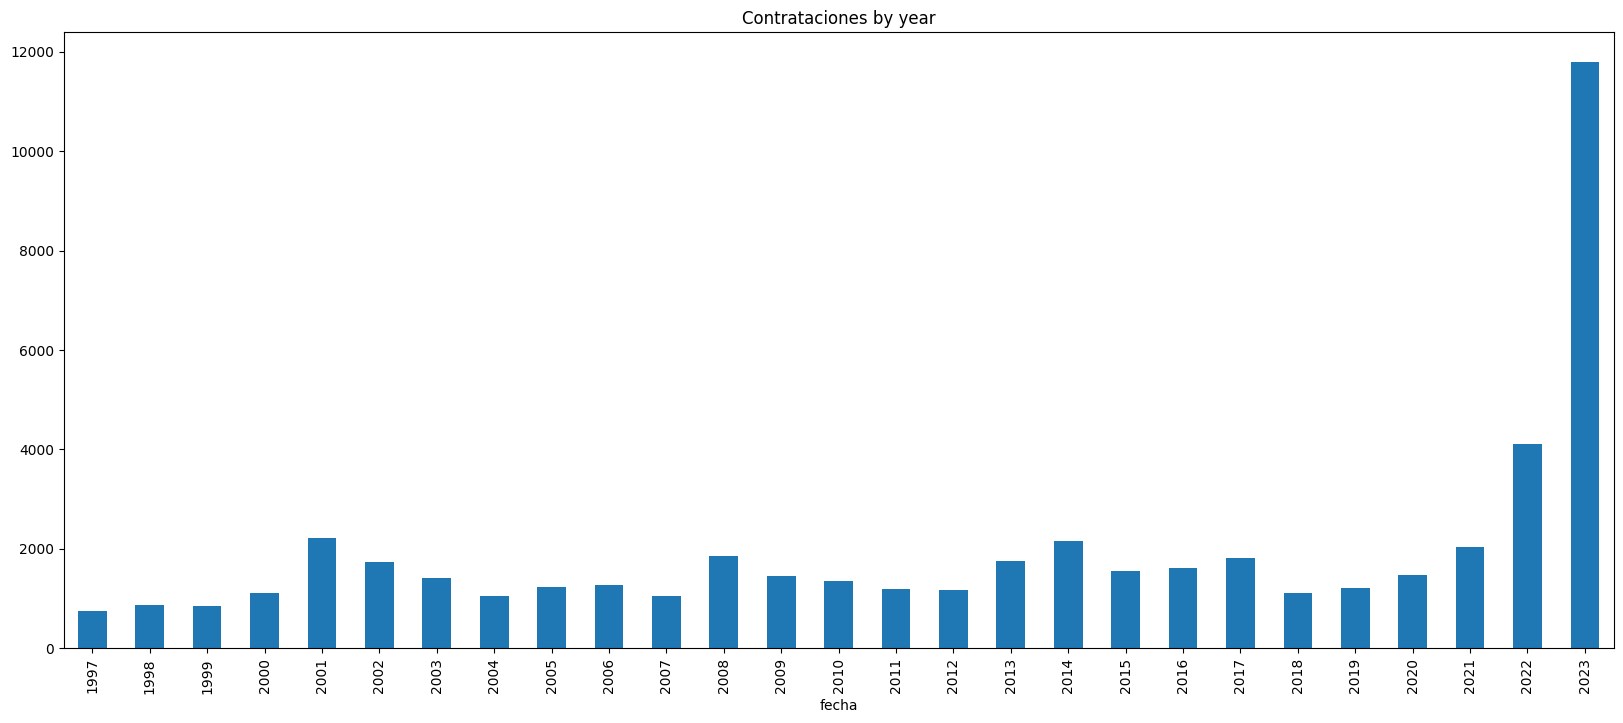

In [7]:
meduca_filtered.groupby(meduca_filtered['fecha'].dt.year).size().plot(kind='bar', figsize=(20,8),title='Contrataciones by year')

In [8]:
meduca_filtered = meduca_ingresos[meduca_ingresos['fecha'].dt.year >=2019]
meduca_filtered['fecha'].hist(bins=40)

<Axes: >

In [9]:
meduca_qty = meduca_filtered.copy()
meduca_qty = meduca_qty.groupby(meduca_qty['fecha'].dt.year).size()
meduca_qty = pd.DataFrame(meduca_qty)
meduca_qty['year'] = meduca_qty.index
meduca_qty.reset_index(inplace=True, drop = True)
meduca_qty.rename(columns={0:'cantidad'},inplace=True)
meduca_qty['delta'] = meduca_qty['cantidad'].pct_change(periods=1) * 100
meduca_qty

cantidad  year       delta
0      1216  2019         NaN
1      1464  2020   20.394737
2      2042  2021   39.480874
3      4116  2022  101.567091
4     11801  2023  186.710398

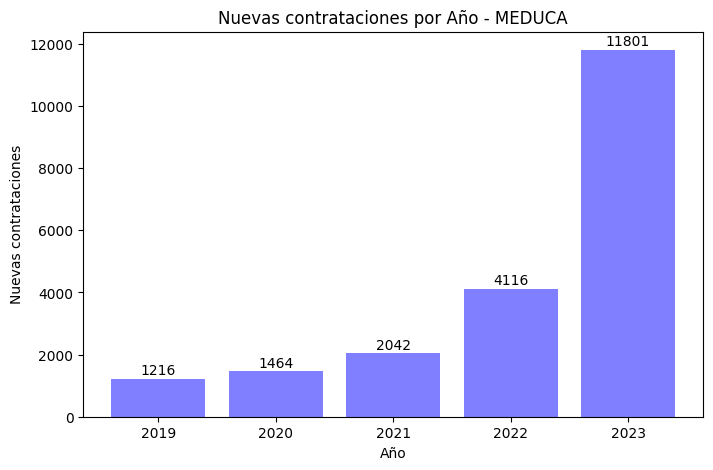

In [10]:
categoria = meduca_filtered['fecha'].dt.year.unique()
meduca_qty = meduca_filtered.groupby(meduca_filtered['fecha'].dt.year).size()
categoria = sorted(categoria)

fig, ax = plt.subplots(figsize=(8, 5))
barras = ax.bar(categoria, meduca_qty, color='blue', alpha=0.5)

ax.set_xlabel('Año')
ax.set_ylabel('Nuevas contrataciones')

for bar, count in zip(barras, meduca_qty):
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0,3), textcoords="offset points", ha="center", fontsize=10)

plt.title('Nuevas contrataciones por Año - MEDUCA')
plt.show()

In [11]:
meduca_qty = meduca_filtered.copy()
meduca_qty = meduca_qty.groupby(meduca_qty['fecha'].dt.year).size()
meduca_qty = pd.DataFrame(meduca_qty)
meduca_qty['year'] = meduca_qty.index
meduca_qty.reset_index(inplace=True, drop=True)
meduca_qty.rename(columns={0:'cantidad'},inplace=True)
meduca_qty['delta'] = meduca_qty['cantidad'].pct_change(periods=1) *100
meduca_qty

cantidad  year       delta
0      1216  2019         NaN
1      1464  2020   20.394737
2      2042  2021   39.480874
3      4116  2022  101.567091
4     11801  2023  186.710398

In [12]:
x = ((11801-1216)/1216) * 100
x

870.4769736842104

posx and posy should be finite values


posx and posy should be finite values


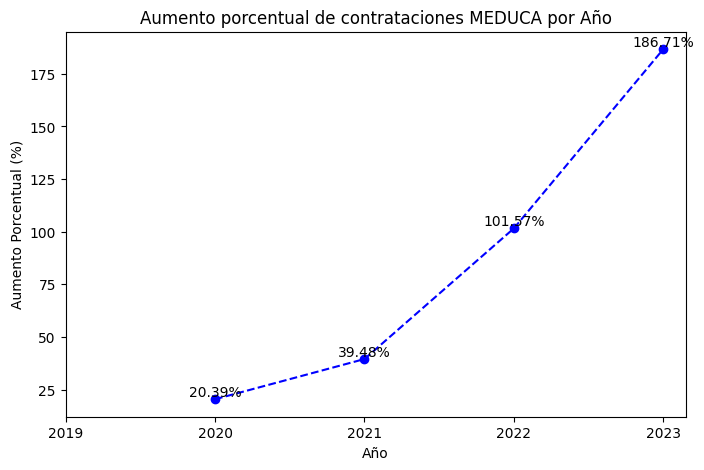

In [13]:
# Definir variables
x = meduca_qty['year']
y = meduca_qty['delta']

# Crear chart
plt.figure(figsize=(8,5))
plt.plot(x,y, marker='o', linestyle = '--', color='blue')

plt.xticks(x)

# Colocar valores en los puntos
for i, j in zip(x,y):
    plt.text(i,j, f'{j:.2f}%', ha="center", va="bottom")

plt.ylabel('Aumento Porcentual (%)')
plt.xlabel('Año')
plt.title('Aumento porcentual de contrataciones MEDUCA por Año')
plt.show()

<Axes: title={'center': 'Contrataciones by year'}, xlabel='fecha'>

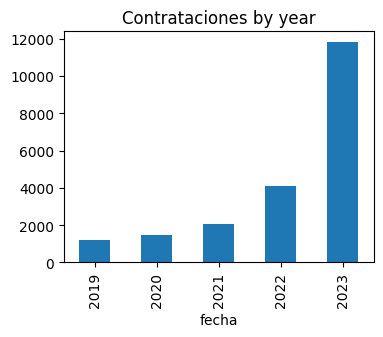

In [14]:
meduca_filtered.groupby(meduca_filtered['fecha'].dt.year).size().plot(kind='bar', figsize=(4,3),title='Contrataciones by year')

In [15]:
categoria = meduca_filtered['fecha'].dt.year.unique()
categoria = sorted(categoria, reverse=False)
meduca_qty = meduca_filtered.groupby(meduca_filtered['fecha'].dt.year).size()

#Inicia el plot
fig, ax = plt.subplots(figsize=(4, 2))

barras = ax.bar(categoria, meduca_qty, color='blue', alpha=0.5)
ax.set_xlabel('Año')
ax.set_ylabel('Nuevas contrataciones')

#Colocar cantidad en cada una de las barras
for bar, count in zip(barras, meduca_qty):
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0,3), textcoords="offset points", ha="center", fontsize=10)

plt.title('Nuevas contrataciones por Año - MEDUCA')
plt.show()


In [16]:
meduca_19_onward = meduca_ingresos[meduca_ingresos['fecha'].dt.year >= 2019].copy()
meduca_19_onward = meduca_19_onward.groupby(meduca_19_onward['fecha'].dt.year).size()
meduca_19_onward


fecha
2019     1216
2020     1464
2021     2042
2022     4116
2023    11801
dtype: int64

In [17]:
meduca_19_onward = meduca_ingresos[meduca_ingresos['fecha'].dt.year >= 2019].copy()
meduca_19_onward = meduca_19_onward.groupby(meduca_19_onward['fecha'].dt.year).size()
meduca_19_onward = pd.DataFrame(meduca_19_onward)
meduca_19_onward['year'] = meduca_19_onward.index
meduca_19_onward.reset_index(inplace=True, drop=True)
meduca_19_onward.rename(columns={0:'cantidad'}, inplace=True)
meduca_19_onward['delta'] = meduca_19_onward['cantidad'].pct_change(periods=1) * 100
meduca_19_onward

cantidad  year       delta
0      1216  2019         NaN
1      1464  2020   20.394737
2      2042  2021   39.480874
3      4116  2022  101.567091
4     11801  2023  186.710398

In [18]:
ax = meduca_19_onward['cantidad'].plot.bar()
ax.set_xlabel('Year')
ax.set_xticklabels(meduca_19_onward.year)
ax.set_alpha(alpha=0.8)
plt.show()

posx and posy should be finite values
posx and posy should be finite values


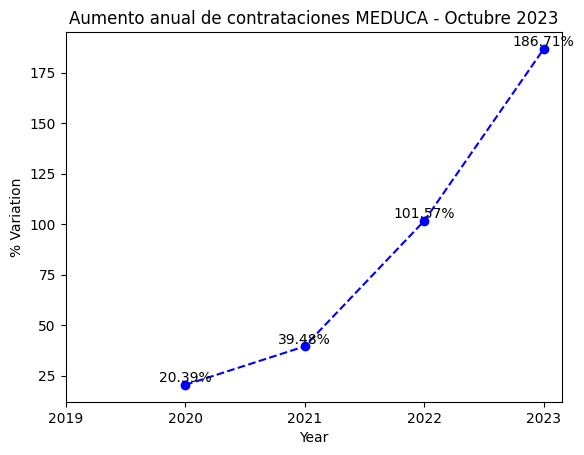

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Set x-axis and y-axis data
x = meduca_19_onward['year']
y = meduca_19_onward['delta']

# Create the line chart with dots
plt.plot(x, y, marker='o', linestyle='--', color='blue')

# Add labels to the axes
plt.xlabel('Year')
plt.ylabel('% Variation')
plt.title('Aumento anual de contrataciones MEDUCA - Octubre 2023')

# Set the x-axis ticks and labels
plt.xticks(x)

# Add value labels above each dot
for i, j in zip(x, y):
    plt.text(i, j, f'{j:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()


In [20]:
meduca_filtered.describe()

Salario         Gasto                          fecha
count  20639.000000  20639.000000                          20639
mean    1225.422394      0.969039  2022-05-02 05:39:21.916759552
min      202.000000      0.000000            2019-01-01 00:00:00
25%      600.000000      0.000000            2022-02-03 00:00:00
50%     1553.100000      0.000000            2023-01-04 00:00:00
75%     1776.100000      0.000000            2023-03-13 00:00:00
max     5627.860000   3500.000000            2023-09-06 00:00:00
std      627.727006     46.228857                            NaN

In [21]:
meduca_19_onward = meduca_ingresos[meduca_ingresos['fecha'].dt.year >= 2019].copy()
meduca_19_onward = meduca_19_onward.groupby(meduca_19_onward['fecha'].dt.year).size()
meduca_19_onward = pd.DataFrame(meduca_19_onward)
meduca_19_onward['year'] = meduca_19_onward.index
meduca_19_onward.reset_index(inplace=True, drop=True)
meduca_19_onward.rename(columns={0:'cantidad'}, inplace=True)
meduca_19_onward['delta'] = meduca_19_onward['cantidad'].pct_change(periods=1) * 100
meduca_19_onward

cantidad  year       delta
0      1216  2019         NaN
1      1464  2020   20.394737
2      2042  2021   39.480874
3      4116  2022  101.567091
4     11801  2023  186.710398

In [22]:
meduca_salarios = meduca_filtered['Salario'].groupby(meduca_filtered['fecha'].dt.year).sum()
meduca_salarios = pd.DataFrame(meduca_salarios)
# meduca_salarios.rename(columns={0:'suma_salarios'}, inplace=True)
meduca_salarios['year'] = meduca_salarios.index
meduca_salarios.reset_index(inplace=True, drop=True)
meduca_salarios['delta'] = meduca_salarios['Salario'].pct_change() * 100
meduca_salarios

Salario  year       delta
0   2192419.33  2019         NaN
1   2449717.63  2020   11.735816
2   3426856.95  2021   39.887835
3   4940344.85  2022   44.165482
4  12282154.03  2023  148.609245

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Set x-axis and y-axis data
x = meduca_salarios['year']
y = meduca_salarios['delta']

# Create the line chart with dots
plt.plot(x, y, marker='o', linestyle='--', color='blue')

# Add labels to the axes
plt.xlabel('Year')
plt.ylabel('% Variation')
plt.title('Aumento anual salarial en concepto de contrataciones nuevas -  MEDUCA - Octubre 2023')

# Set the x-axis ticks and labels
plt.xticks(x)

# Add value labels above each dot
for i, j in zip(x, y):
    plt.text(i, j, f'{j:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()


posx and posy should be finite values


posx and posy should be finite values


In [24]:
total = 0
for idx, row in meduca_salarios.iterrows():
    print(f'Year {row[1]:.0f} = ${row[0]:,.2f}')
    total = total + row[0]

print(f'Total = ${total:,.2f}')

Year 2019 = $2,192,419.33
Year 2020 = $2,449,717.63
Year 2021 = $3,426,856.95
Year 2022 = $4,940,344.85
Year 2023 = $12,282,154.03
Total = $25,291,492.79


/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_68802/6950672.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Year {row[1]:.0f} = ${row[0]:,.2f}')
/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_68802/6950672.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = total + row[0]


In [25]:
x = meduca['Salario'].sum()
print(f'${x:,.2f}')

$98,743,961.87


In [26]:
meduca['Salario'].describe()

count    60000.000000
mean      1645.732698
std        624.823294
min        202.000000
25%       1553.100000
50%       1857.540000
75%       2012.987500
max       5627.860000
Name: Salario, dtype: float64

# Análisis Salarial

In [27]:
meduca_salario = meduca.copy()
meduca_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nombre           60000 non-null  object 
 1   Apellido         60000 non-null  object 
 2   Cédula           60000 non-null  object 
 3   Cargo            60000 non-null  object 
 4   Salario          60000 non-null  float64
 5   Gasto            60000 non-null  int64  
 6   Estado           60000 non-null  object 
 7   Fecha de inicio  60000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.7+ MB


In [28]:
meduca_salario['compensacion total'] = meduca_salario['Salario'] + meduca_salario['Gasto']
meduca_salario.head(1)

Nombre Apellido         Cédula  \
0  AARON   ABREGO  8-0778-000967   

                                               Cargo  Salario  Gasto  \
0  EDUCADOR M 1 (PROFESOR EDUC. SEC. 2DA. CAT. TI...   1692.6      0   

                      Estado Fecha de inicio  compensacion total  
0  INTERINO HASTA FIN DE AÑO      26/04/2023              1692.6

In [29]:
meduca_salario['compensacion total'].describe()

count    60000.000000
mean      1646.066031
std        626.260754
min        202.000000
25%       1553.100000
50%       1857.540000
75%       2012.987500
max       7000.000000
Name: compensacion total, dtype: float64

In [30]:
meduca_salario['Fecha de inicio'] = pd.to_datetime(meduca_salario['Fecha de inicio'])

/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_68802/1798492982.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  meduca_salario['Fecha de inicio'] = pd.to_datetime(meduca_salario['Fecha de inicio'])


In [31]:
meduca_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Nombre              60000 non-null  object        
 1   Apellido            60000 non-null  object        
 2   Cédula              60000 non-null  object        
 3   Cargo               60000 non-null  object        
 4   Salario             60000 non-null  float64       
 5   Gasto               60000 non-null  int64         
 6   Estado              60000 non-null  object        
 7   Fecha de inicio     60000 non-null  datetime64[ns]
 8   compensacion total  60000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 4.1+ MB


In [32]:
salarios = meduca_salario.groupby(meduca_salario['Fecha de inicio'].dt.year)['compensacion total'].sum()
salarios = pd.DataFrame(salarios)
salarios['year'] = salarios.index
salarios.reset_index(inplace=True, drop=True)
salarios

compensacion total  year
0              2354.42  1900
1              2135.23  1969
2              1200.00  1971
3             15017.96  1972
4              9525.10  1973
5             11146.05  1974
6             51191.64  1975
7             64511.71  1976
8            473244.13  1977
9            452952.74  1978
10           547493.45  1979
11           542289.90  1980
12           683796.58  1981
13           652823.84  1982
14           760211.00  1983
15           785935.73  1984
16           736778.99  1985
17           844542.49  1986
18           851325.18  1987
19           953594.29  1988
20           709054.35  1989
21           822977.29  1990
22           771924.36  1991
23          1060093.25  1992
24          1265742.29  1993
25          1516860.01  1994
26          1628796.82  1995
27          1711428.11  1996
28          1472403.05  1997
29          1746369.07  1998
30          1738907.28  1999
31          2130644.84  2000
32          4293809.30  2001
33          3450423.39  2002
34          2740982.94  2003
35          2060145.66  2004
36          1978563.95  2005
37          2048244.96  2006
38          1899339.08  2007
39          2862796.45  2008
40          2718371.52  2009
41          2395984.32  2010
42          2001760.27  2011
43          2061530.34  2012
44          3094056.83  2013
45          4070651.91  2014
46          2751769.08  2015
47          2856026.84  2016
48          3159720.77  2017
49          1991020.32  2018
50          2200169.33  2019
51          2449967.63  2020
52          3427356.95  2021
53          4947344.85  2022
54         12286654.03  2023

In [33]:
total = salarios['compensacion total'].sum()

for idx, row in salarios.iterrows():
    print(f'Año: {row[1]:.0f} == Monto: ${row[0]:,.2f}')



print(f'Monto total: ${total:,.2f}')

/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_68802/2542977058.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Año: {row[1]:.0f} == Monto: ${row[0]:,.2f}')


Año: 1900 == Monto: $2,354.42
Año: 1969 == Monto: $2,135.23
Año: 1971 == Monto: $1,200.00
Año: 1972 == Monto: $15,017.96
Año: 1973 == Monto: $9,525.10
Año: 1974 == Monto: $11,146.05
Año: 1975 == Monto: $51,191.64
Año: 1976 == Monto: $64,511.71
Año: 1977 == Monto: $473,244.13
Año: 1978 == Monto: $452,952.74
Año: 1979 == Monto: $547,493.45
Año: 1980 == Monto: $542,289.90
Año: 1981 == Monto: $683,796.58
Año: 1982 == Monto: $652,823.84
Año: 1983 == Monto: $760,211.00
Año: 1984 == Monto: $785,935.73
Año: 1985 == Monto: $736,778.99
Año: 1986 == Monto: $844,542.49
Año: 1987 == Monto: $851,325.18
Año: 1988 == Monto: $953,594.29
Año: 1989 == Monto: $709,054.35
Año: 1990 == Monto: $822,977.29
Año: 1991 == Monto: $771,924.36
Año: 1992 == Monto: $1,060,093.25
Año: 1993 == Monto: $1,265,742.29
Año: 1994 == Monto: $1,516,860.01
Año: 1995 == Monto: $1,628,796.82
Año: 1996 == Monto: $1,711,428.11
Año: 1997 == Monto: $1,472,403.05
Año: 1998 == Monto: $1,746,369.07
Año: 1999 == Monto: $1,738,907.28
Año:

In [35]:
import locale
x = sorted(meduca_filtered['fecha'].dt.year.unique())
y = meduca_filtered['Salario'].groupby(meduca_filtered['fecha'].dt.year).sum()

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

fig, ax = plt.subplots(figsize=(8,4))

line = ax.plot(x, y, marker='o', linestyle='--', color='red')
ax.get_yaxis().set_major_formatter(lambda x, p: locale.format_string('$%.0f',x, grouping=True))

for i, amount in enumerate(y):
    ax.text(x[i], amount, locale.format_string('$%.2f', amount, grouping=True), ha='center', va='bottom', fontsize=10)


plt.title('Sumatoria Salarial de Funcionarios por Año de Ingreso Laboral')
plt.xticks(x,rotation=45)
plt.show()

In [36]:
x = salarios['year'][salarios['year'] >= 2019]
x

50    2019
51    2020
52    2021
53    2022
54    2023
Name: year, dtype: int32

In [37]:
y = salarios['compensacion total']
y

0         2354.42
1         2135.23
2         1200.00
3        15017.96
4         9525.10
5        11146.05
6        51191.64
7        64511.71
8       473244.13
9       452952.74
10      547493.45
11      542289.90
12      683796.58
13      652823.84
14      760211.00
15      785935.73
16      736778.99
17      844542.49
18      851325.18
19      953594.29
20      709054.35
21      822977.29
22      771924.36
23     1060093.25
24     1265742.29
25     1516860.01
26     1628796.82
27     1711428.11
28     1472403.05
29     1746369.07
30     1738907.28
31     2130644.84
32     4293809.30
33     3450423.39
34     2740982.94
35     2060145.66
36     1978563.95
37     2048244.96
38     1899339.08
39     2862796.45
40     2718371.52
41     2395984.32
42     2001760.27
43     2061530.34
44     3094056.83
45     4070651.91
46     2751769.08
47     2856026.84
48     3159720.77
49     1991020.32
50     2200169.33
51     2449967.63
52     3427356.95
53     4947344.85
54    12286654.03
Name: comp

In [38]:
x = sorted(meduca_filtered['fecha'].dt.year.unique())
x 

[2019, 2020, 2021, 2022, 2023]

In [39]:
y = meduca_filtered['Salario'].groupby(meduca_filtered['fecha'].dt.year).sum()
y

fecha
2019     2192419.33
2020     2449717.63
2021     3426856.95
2022     4940344.85
2023    12282154.03
Name: Salario, dtype: float64

In [40]:
import locale
# x = salarios['year'][salarios['year'] >= 2019].unique()
x = sorted(meduca_filtered['fecha'].dt.year.unique())
# y = salarios['compensacion total'][salarios['year'] >= 2019]
y = meduca_filtered['Salario'].groupby(meduca_filtered['fecha'].dt.year).sum()
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

fig, ax = plt.subplots(figsize=(8,5))

line = ax.plot(x, y, marker='o', linestyle='--', color='red')

ax.get_yaxis().set_major_formatter(lambda x, p: locale.format_string('$%.0f', x, grouping=True))

for i, amount in enumerate(y):
    ax.text(x[i], amount, locale.format_string('$%.2f', amount, grouping=True), ha='center', va='bottom', fontsize=10)

plt.title('Gasto Monetario de Funcionarios por Año de Ingreso Laboral')
plt.xticks(x)
# plt.grid()
plt.show()

## Cédulas Repetidas

In [41]:
meduca_cedulas = meduca.copy()
meduca_cedulas.head(2)

Nombre  Apellido         Cédula  \
0  AARON    ABREGO  8-0778-000967   
1  AARON  CARRILLO  8-0785-002235   

                                               Cargo  Salario  Gasto  \
0  EDUCADOR M 1 (PROFESOR EDUC. SEC. 2DA. CAT. TI...  1692.60      0   
1  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1827.26      0   

                      Estado Fecha de inicio  
0  INTERINO HASTA FIN DE AÑO      26/04/2023  
1                 PERMANENTE      20/02/2019

In [42]:
meduca_cedulas['Fecha de inicio'] = pd.to_datetime(meduca_cedulas['Fecha de inicio'])
meduca_cedulas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nombre           60000 non-null  object        
 1   Apellido         60000 non-null  object        
 2   Cédula           60000 non-null  object        
 3   Cargo            60000 non-null  object        
 4   Salario          60000 non-null  float64       
 5   Gasto            60000 non-null  int64         
 6   Estado           60000 non-null  object        
 7   Fecha de inicio  60000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_68802/3643353105.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  meduca_cedulas['Fecha de inicio'] = pd.to_datetime(meduca_cedulas['Fecha de inicio'])


In [44]:
meduca_cedulas['Cédula'].value_counts()

Cédula
2-0102-000131     2
3-0111-000617     2
9-0722-000114     2
4-0700-001413     2
8-0288-000249     2
                 ..
8-0724-000502     1
9-0700-001069     1
3-0103-000031     1
2-0102-000928     1
10-0027-000878    1
Name: count, Length: 59833, dtype: int64

In [50]:
value_counts = meduca_cedulas['Cédula'].value_counts()
result = value_counts[value_counts >= 2]
result = pd.DataFrame(result)
result['cedula'] = result.index
result.reset_index(inplace=True, drop=True)
print(len(result))
result


167


count          cedula
0        2   2-0102-000131
1        2   3-0111-000617
2        2   9-0722-000114
3        2   4-0700-001413
4        2   8-0288-000249
..     ...             ...
162      2   9-0101-000098
163      2   4-0206-000468
164      2   4-0222-000834
165      2  10-0033-000041
166      2   4-0200-000918

[167 rows x 2 columns]

In [52]:
repetidos = meduca_cedulas.merge(result, left_on='Cédula', right_on='cedula').copy()
repetidos

Nombre Apellido         Cédula  \
0    ABELINO    MUNOZ  9-0181-000281   
1    ABELINO    MUNOZ  9-0181-000281   
2     ADAMIS   ROBIRA  5-0710-000174   
3     ADAMIS   ROBIRA  5-0710-000174   
4     ADOLFO    ARAUZ  8-0225-000692   
..       ...      ...            ...   
329   SHAMIA    REYES  8-0481-000994   
330   SHERLY   RAMSEY  8-0413-000976   
331   SHERLY   RAMSEY  8-0413-000976   
332    SIMON   MARTES  8-0735-001578   
333    SIMON   MARTES  8-0735-001578   

                                                 Cargo  Salario  Gasto  \
0    EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1819.10      0   
1                                     PROMOTOR COMUNAL   371.00      0   
2    EDUCADOR J 1 (MAESTRO ESC.PRIM.TIT.PROF EDUC.S...  1906.90      0   
3                                     PROMOTOR COMUNAL   371.00      0   
4    EDUCADOR K 1 (MAESTRO DIRECTOR TIT.UNIV.PROF.E...  1894.97      0   
..                                                 ...      ...    ...   
329  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1791.10      0   
330  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1860.14      0   
331                                   PROMOTOR COMUNAL   371.00      0   
332  EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...  1671.52      0   
333  EDUCADOR M 1 (PROFESOR EDUC. SEC. 2DA. CAT. TI...   284.00      0   

                        Estado Fecha de inicio  count         cedula  
0       PERIODO PROB. DE 1 AÑO      2022-03-17      2  9-0181-000281  
1                     EVENTUAL      2023-03-06      2  9-0181-000281  
2                   PERMANENTE      2020-03-14      2  5-0710-000174  
3                     EVENTUAL      2023-03-10      2  5-0710-000174  
4                   PERMANENTE      2013-02-13      2  8-0225-000692  
..                         ...             ...    ...            ...  
329                 PERMANENTE      2022-05-01      2  8-0481-000994  
330                 PERMANENTE      2015-02-23      2  8-0413-000976  
331                   EVENTUAL      2023-03-08      2  8-0413-000976  
332     PERIODO PROB. DE 1 AÑO      2011-03-11      2  8-0735-001578  
333  INTERINO HASTA FIN DE AÑO      2023-06-01      2  8-0735-001578  

[334 rows x 10 columns]

In [74]:
len(repetidos[repetidos['Fecha de inicio'].dt.year == 2001])
repetidos[repetidos['Fecha de inicio'].dt.year == 2001]

Nombre    Apellido          Cédula  \
6       ADRIANA    CASTILLO   2-0161-000807   
34     ANGELICA       AVILA   3-0111-000409   
71      CECILIO    CASTILLO   9-0101-000177   
113     DOMINGO  CONCEPCION   9-0125-001733   
170  FRANQUILES       AVILA   7-0088-000408   
228       JULIO    GALLARDO   3-0088-000121   
278   NARCIANEL      MADRID   4-0180-000134   
282       NILSA      VARGAS   3-0086-001975   
302        RAUL       GOMEZ  10-0702-001880   

                                                 Cargo  Salario  Gasto  \
6    EDUCADOR J 1 (MAESTRO ESC.PRIM.TIT.PROF EDUC.S...  1988.86      0   
34   EDUCADOR J 1 (MAESTRO ESC.PRIM.TIT.PROF EDUC.S...  2031.97      0   
71   EDUCADOR R 2 (SUBDIRECTOR SEC.TIT.UNIV.  PROF....  2506.43      0   
113  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...   362.50      0   
170  EDUCADOR J 1 (MAESTRO ESC.PRIM.TIT.PROF EDUC.S...  2006.27      0   
228  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...   430.00      0   
278  EDUCADOR M 1 (PROFESOR EDUC. SEC. 2DA. CAT. TI...  2116.81      0   
282                               TRABAJADOR MANUAL  I   700.00      0   
302  EDUCADOR D 2 (PROFESOR DE EDUCACION SEC DE 3A....  2216.08      0   

               Estado Fecha de inicio  count          cedula  
6          PERMANENTE      2001-03-19      2   2-0161-000807  
34         PERMANENTE      2001-01-01      2   3-0111-000409  
71         PERMANENTE      2001-03-20      2   9-0101-000177  
113  INTERINO ABIERTO      2001-01-01      2   9-0125-001733  
170        PERMANENTE      2001-03-13      2   7-0088-000408  
228          EVENTUAL      2001-03-09      2   3-0088-000121  
278        PERMANENTE      2001-01-01      2   4-0180-000134  
282        PERMANENTE      2001-01-02      2   3-0086-001975  
302        PERMANENTE      2001-01-01      2  10-0702-001880

In [77]:
repetidos[repetidos['cedula']=='10-0702-001880']

Nombre Apellido          Cédula  \
302   RAUL    GOMEZ  10-0702-001880   
303   RAUL    GOMEZ  10-0702-001880   

                                                 Cargo  Salario  Gasto  \
302  EDUCADOR D 2 (PROFESOR DE EDUCACION SEC DE 3A....  2216.08      0   
303                                   PROMOTOR COMUNAL   371.00      0   

         Estado Fecha de inicio  count          cedula  
302  PERMANENTE      2001-01-01      2  10-0702-001880  
303    EVENTUAL      2023-03-06      2  10-0702-001880

<Axes: ylabel='Frequency'>

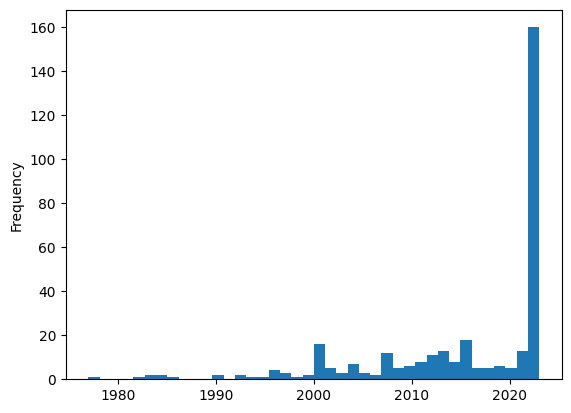

In [68]:
repetidos['Fecha de inicio'].dt.year.plot.hist(bins=40)

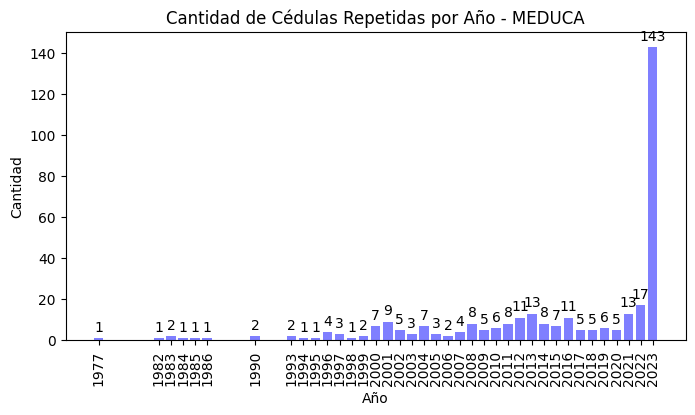

In [73]:
categoria = sorted(repetidos['Fecha de inicio'].dt.year.unique())
cantidades = repetidos.groupby(repetidos['Fecha de inicio'].dt.year).size()

fig, ax = plt.subplots(figsize=(8,4))

barras = ax.bar(categoria, cantidades, color= 'blue', alpha=0.5)

ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')

for bar, count in zip(barras, cantidades):
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0,5), textcoords="offset points", ha="center", fontsize=10)


plt.xticks(categoria, rotation=90)
plt.title('Cantidad de Cédulas Repetidas por Año - MEDUCA')
plt.show()

## Cédulas Repetidas en la Planilla

In [78]:
cedulas = meduca.copy()
cedulas['Fecha de inicio'] = pd.to_datetime(cedulas['Fecha de inicio'])
cedulas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nombre           60000 non-null  object        
 1   Apellido         60000 non-null  object        
 2   Cédula           60000 non-null  object        
 3   Cargo            60000 non-null  object        
 4   Salario          60000 non-null  float64       
 5   Gasto            60000 non-null  int64         
 6   Estado           60000 non-null  object        
 7   Fecha de inicio  60000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_68802/2962588173.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cedulas['Fecha de inicio'] = pd.to_datetime(cedulas['Fecha de inicio'])


In [79]:
cedulas['Cédula'].value_counts()

Cédula
2-0102-000131     2
3-0111-000617     2
9-0722-000114     2
4-0700-001413     2
8-0288-000249     2
                 ..
8-0724-000502     1
9-0700-001069     1
3-0103-000031     1
2-0102-000928     1
10-0027-000878    1
Name: count, Length: 59833, dtype: int64

In [82]:
cedulas_repetidas = cedulas['Cédula'].value_counts()
resultados = cedulas_repetidas[cedulas_repetidas >= 2]
resultados = pd.DataFrame(resultados)
resultados['cedula'] = resultados.index
resultados.reset_index(inplace=True, drop=True)
print('Total cedulas repetidas: ' + str(len(resultados)))
resultados

Total cedulas repetidas: 167


count          cedula
0        2   2-0102-000131
1        2   3-0111-000617
2        2   9-0722-000114
3        2   4-0700-001413
4        2   8-0288-000249
..     ...             ...
162      2   9-0101-000098
163      2   4-0206-000468
164      2   4-0222-000834
165      2  10-0033-000041
166      2   4-0200-000918

[167 rows x 2 columns]

In [85]:
union = cedulas.merge(resultados, left_on="Cédula", right_on='cedula')
union

Nombre Apellido         Cédula  \
0    ABELINO    MUNOZ  9-0181-000281   
1    ABELINO    MUNOZ  9-0181-000281   
2     ADAMIS   ROBIRA  5-0710-000174   
3     ADAMIS   ROBIRA  5-0710-000174   
4     ADOLFO    ARAUZ  8-0225-000692   
..       ...      ...            ...   
329   SHAMIA    REYES  8-0481-000994   
330   SHERLY   RAMSEY  8-0413-000976   
331   SHERLY   RAMSEY  8-0413-000976   
332    SIMON   MARTES  8-0735-001578   
333    SIMON   MARTES  8-0735-001578   

                                                 Cargo  Salario  Gasto  \
0    EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1819.10      0   
1                                     PROMOTOR COMUNAL   371.00      0   
2    EDUCADOR J 1 (MAESTRO ESC.PRIM.TIT.PROF EDUC.S...  1906.90      0   
3                                     PROMOTOR COMUNAL   371.00      0   
4    EDUCADOR K 1 (MAESTRO DIRECTOR TIT.UNIV.PROF.E...  1894.97      0   
..                                                 ...      ...    ...   
329  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1791.10      0   
330  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1860.14      0   
331                                   PROMOTOR COMUNAL   371.00      0   
332  EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...  1671.52      0   
333  EDUCADOR M 1 (PROFESOR EDUC. SEC. 2DA. CAT. TI...   284.00      0   

                        Estado Fecha de inicio  count         cedula  
0       PERIODO PROB. DE 1 AÑO      2022-03-17      2  9-0181-000281  
1                     EVENTUAL      2023-03-06      2  9-0181-000281  
2                   PERMANENTE      2020-03-14      2  5-0710-000174  
3                     EVENTUAL      2023-03-10      2  5-0710-000174  
4                   PERMANENTE      2013-02-13      2  8-0225-000692  
..                         ...             ...    ...            ...  
329                 PERMANENTE      2022-05-01      2  8-0481-000994  
330                 PERMANENTE      2015-02-23      2  8-0413-000976  
331                   EVENTUAL      2023-03-08      2  8-0413-000976  
332     PERIODO PROB. DE 1 AÑO      2011-03-11      2  8-0735-001578  
333  INTERINO HASTA FIN DE AÑO      2023-06-01      2  8-0735-001578  

[334 rows x 10 columns]

<Axes: ylabel='Frequency'>

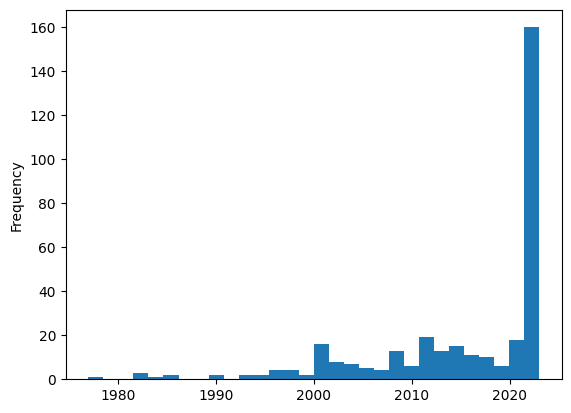

In [86]:
union['Fecha de inicio'].dt.year.plot.hist(bins=30)

In [93]:
categorias = sorted(union['Fecha de inicio'].dt.year.unique())
cantidad = union.groupby(union['Fecha de inicio'].dt.year).size()

fig, ax = plt.subplots(figsize=(10,4))

barras = ax.bar(categorias, cantidades, color='blue', alpha=0.7)

ax.set_xlabel('Año')
ax.set_ylabel('Cantidades')

for bar, count in zip(barras, cantidades):
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0,5), textcoords="offset points", ha="center", fontsize=10)


plt.xticks(categorias, rotation=90)
plt.title('Cantidad de Cédulas Repetidas según Año de inicio laboral')
plt.show()



In [138]:
# 2016 = 11

len(union[union['Fecha de inicio'].dt.year == 2016])

11

## Tipo de Contrato

In [239]:
contrato = meduca.copy()
contrato['Fecha de inicio'] = pd.to_datetime(contrato['Fecha de inicio'])
contrato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nombre           60000 non-null  object        
 1   Apellido         60000 non-null  object        
 2   Cédula           60000 non-null  object        
 3   Cargo            60000 non-null  object        
 4   Salario          60000 non-null  float64       
 5   Gasto            60000 non-null  int64         
 6   Estado           60000 non-null  object        
 7   Fecha de inicio  60000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_68802/3988611587.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  contrato['Fecha de inicio'] = pd.to_datetime(contrato['Fecha de inicio'])


In [254]:
monto_contrato = contrato.groupby('Estado')['Salario'].sum().copy()
monto_contrato = pd.DataFrame(monto_contrato)
monto_contrato['contrato'] = monto_contrato.index
monto_contrato.reset_index(inplace=True, drop=True)
monto_contrato.rename(columns={0:'monto'}, inplace=True)
monto_contrato

Salario                   contrato
0   6686905.25                   EVENTUAL
1     22913.10           INTERINO ABIERTO
2   4315233.21  INTERINO HASTA FIN DE AÑO
3   2746208.80       PERIODO PROB. 2 AÑOS
4   1692862.74     PERIODO PROB. DE 1 AÑO
5  83279238.77                 PERMANENTE
6       600.00                POR ASIGNAR

In [255]:
for idx, row in monto_contrato.iterrows():
    print(f'Tipo Contrato: {row[1]} - Monto Salarial: ${row[0]:,.2f}')

Tipo Contrato: EVENTUAL - Monto Salarial: $6,686,905.25
Tipo Contrato: INTERINO ABIERTO - Monto Salarial: $22,913.10
Tipo Contrato: INTERINO HASTA FIN DE AÑO - Monto Salarial: $4,315,233.21
Tipo Contrato: PERIODO PROB. 2 AÑOS - Monto Salarial: $2,746,208.80
Tipo Contrato: PERIODO PROB. DE 1 AÑO - Monto Salarial: $1,692,862.74
Tipo Contrato: PERMANENTE - Monto Salarial: $83,279,238.77
Tipo Contrato: POR ASIGNAR - Monto Salarial: $600.00


/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_68802/2420281508.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Tipo Contrato: {row[1]} - Monto Salarial: ${row[0]:,.2f}')


In [256]:
contrato['Salario'][contrato['Estado']=='EVENTUAL'].sum()

6686905.25

In [278]:
import locale
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

x = monto_contrato['contrato']
y = monto_contrato['Salario']

# Sort x and y values together based on y
sorted_data = sorted(zip(x, y), key=lambda x: x[1])
x, y = zip(*sorted_data)

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

fig, ax = plt.subplots()

barras = ax.bar(x, y, color='blue', alpha=0.6)

ax.set_xlabel('Tipo de Contrato')
ax.set_ylabel('Monto Salarial')

for bar, count in zip(barras, y):
    formatted_count = locale.currency(count, grouping=True)
    ax.annotate(formatted_count, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

plt.xticks(rotation=90)
plt.title('Data Occurrences and Money Amount by Year')
fig.tight_layout()


ax.get_yaxis().set_major_formatter(lambda x, p: locale.format_string('$%.2f', x, grouping=True))

plt.show()


In [258]:
contrato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nombre           60000 non-null  object        
 1   Apellido         60000 non-null  object        
 2   Cédula           60000 non-null  object        
 3   Cargo            60000 non-null  object        
 4   Salario          60000 non-null  float64       
 5   Gasto            60000 non-null  int64         
 6   Estado           60000 non-null  object        
 7   Fecha de inicio  60000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


<Axes: title={'center': 'Salario'}, xlabel='Estado'>

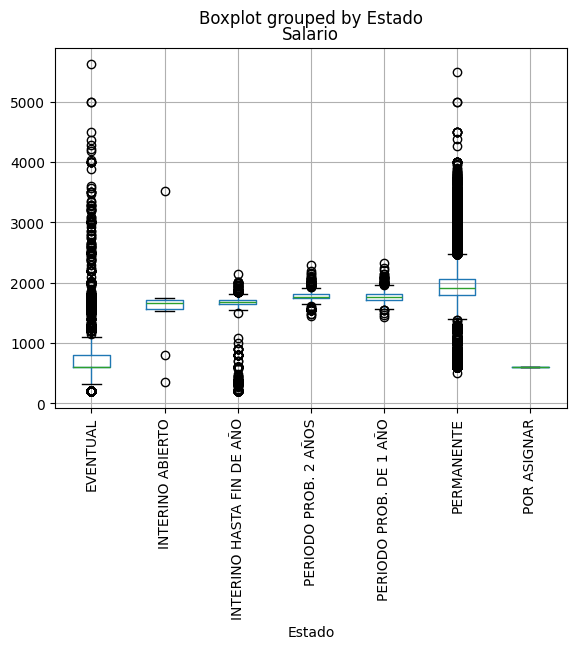

In [274]:
contrato.boxplot(column="Salario", by="Estado", rot=90)

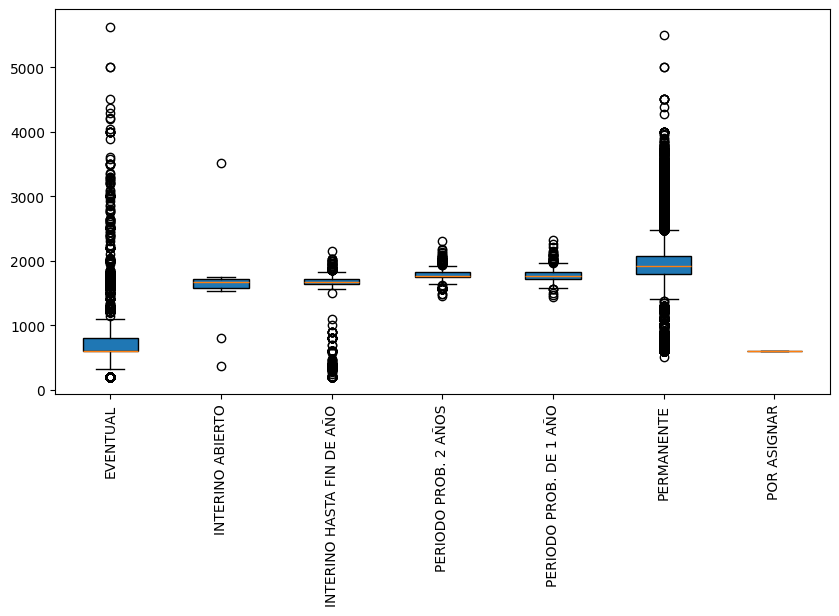

In [244]:
import matplotlib.pyplot as plt
import numpy as np

x = contrato['Salario']
y = contrato['Estado']

# Group your 'Salario' data by 'Estado' into a list of lists
data_grouped = [x[y == estado] for estado in np.unique(y)]

fig, ax = plt.subplots(figsize=(10,5))

# Create a box plot for each group
bplot1 = ax.boxplot(data_grouped, vert=True, patch_artist=True, labels=np.unique(y))

plt.xticks(rotation=90)

plt.show()

Text(0.5, 1.0, 'Boxplot')

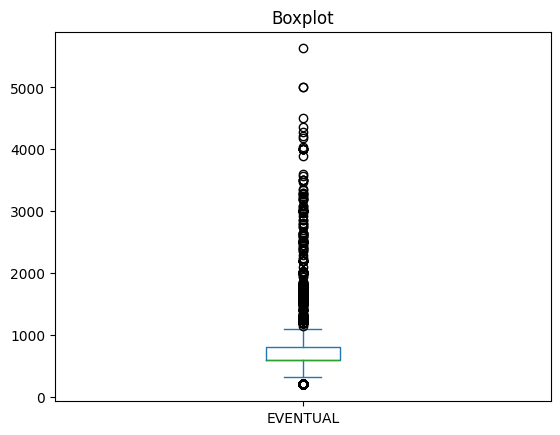

In [207]:
contrato[contrato['Estado'] == 'EVENTUAL'].plot.box(column='Salario', by='Estado')
plt.title('Boxplot')

In [188]:
contrato[contrato['Estado'] == 'EVENTUAL']['Salario']

2        1553.1
8         900.0
14        600.0
20        600.0
26        600.0
          ...  
59966     800.0
59974    1100.0
59989     900.0
59990     600.0
59995     600.0
Name: Salario, Length: 8898, dtype: float64

In [253]:
data = contrato[contrato['Estado'] == 'EVENTUAL']['Salario']
data

2        1553.1
8         900.0
14        600.0
20        600.0
26        600.0
          ...  
59966     800.0
59974    1100.0
59989     900.0
59990     600.0
59995     600.0
Name: Salario, Length: 8898, dtype: float64

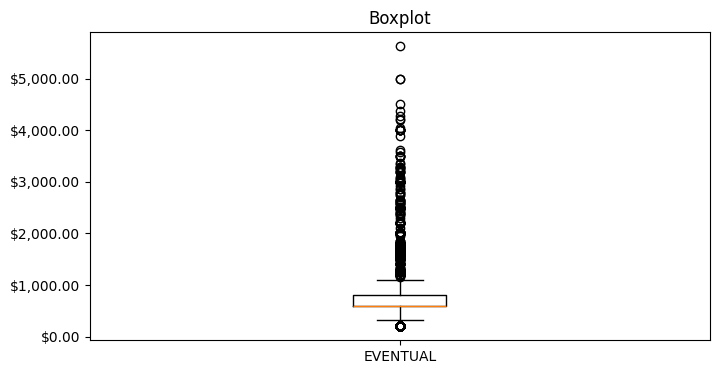

In [245]:
import matplotlib.pyplot as plt
import locale

# Assuming 'contrato' is a DataFrame with your data
eventual_data = contrato[contrato['Estado'] == 'EVENTUAL']['Salario']
label = 'EVENTUAL'


locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

fig, ax = plt.subplots(figsize=(8,4))

box = ax.boxplot(eventual_data, vert=True, labels=[label])
ax.get_yaxis().set_major_formatter(lambda x, p: locale.format_string('$%.2f', x, grouping=True))


plt.title('Boxplot')
plt.show()

In [315]:
import matplotlib.pyplot as plt
import locale

# Assuming 'contrato' is a DataFrame with your data
eventual_data = contrato[contrato['Estado'] == 'EVENTUAL']['Salario']
label = 'EVENTUAL'

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

fig, ax = plt.subplots(figsize=(8, 7))

box = ax.boxplot(eventual_data, vert=True, labels=[label])

# Calculate Q1, Q3, and IQR
Q1 = contrato[contrato['Estado'] == 'EVENTUAL']['Salario'].quantile(q=0.25)  # Lower bound of the box
Q3 = contrato[contrato['Estado'] == 'EVENTUAL']['Salario'].quantile(q=0.75)  # Upper bound of the box
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the median value from the boxplot
median_value = box['medians'][0].get_ydata()[0]

# Display the statistics on the plot
ax.text(1.1, Q1, f'Q1: {Q1:.2f}', va='center', color='blue')
ax.text(1.1, Q3, f'Q3: {Q3:.2f}', va='center', color='blue')
# ax.text(1.1, Q1 + 0.1 * (Q3 - Q1), f'Q2 (Median): {median_value:.2f}', va='bottom', color='blue')  # Adjust the y-coordinate
ax.text(1.1, lower_bound, f'Límite Inferior: {lower_bound:.2f}', va='center', color='red')
ax.text(1.1, upper_bound, f'Límite Superior: {upper_bound:.2f}', va='center', color='red')

ax.get_yaxis().set_major_formatter(lambda x, p: locale.format_string('$%.2f', x, grouping=True))

plt.title('Boxplot')
plt.show()


In [247]:
contrato[contrato['Estado'] == 'EVENTUAL']['Salario'].describe()

count    8898.000000
mean      751.506546
std       468.036168
min       202.000000
25%       600.000000
50%       600.000000
75%       800.000000
max      5627.860000
Name: Salario, dtype: float64

In [248]:
contrato[contrato['Estado'] == 'EVENTUAL']['Salario'].quantile(q=0.9)

1553.1

In [250]:
contrato[contrato['Estado'] == 'EVENTUAL']

Nombre  Apellido         Cédula  \
2         AARON   CARRION  9-0718-000301   
8         AARON      RUIZ  1-0035-000506   
14         ABBY  AIZPURUA  4-0719-000490   
20        ABDEL    CHACON  8-0923-002052   
26       ABDIAS     CHANG  9-0733-001984   
...         ...       ...            ...   
59966     TANIA    ROGERS  8-0789-000593   
59974     TANIA      VEGA  8-0455-000388   
59989   TANISHA    PANEZO  8-0871-002192   
59990  TANISHKA    RACERO  3-0711-002251   
59995     TANYA  PALACIOS  3-0721-000370   

                                                   Cargo  Salario  Gasto  \
2      EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...   1553.1      0   
8                               AUXILIAR DE CONTABILIDAD    900.0      0   
14                                  TRABAJADOR MANUAL  I    600.0      0   
20                                 AGENTE DE SEGURIDAD I    600.0      0   
26                                     INSPECTOR DOCENTE    600.0      0   
...                                                  ...      ...    ...   
59966                           AUXILIAR DE CONTABILIDAD    800.0      0   
59974                                    ADMINISTRADOR I   1100.0      0   
59989                           AUXILIAR DE CONTABILIDAD    900.0      0   
59990                                  INSPECTOR DOCENTE    600.0      0   
59995                               TRABAJADOR MANUAL  I    600.0      0   

         Estado Fecha de inicio  
2      EVENTUAL      2019-03-29  
8      EVENTUAL      2023-06-22  
14     EVENTUAL      2023-01-03  
20     EVENTUAL      2023-01-01  
26     EVENTUAL      2023-01-03  
...         ...             ...  
59966  EVENTUAL      2023-06-12  
59974  EVENTUAL      2023-01-03  
59989  EVENTUAL      2023-06-08  
59990  EVENTUAL      2021-10-05  
59995  EVENTUAL      2023-01-05  

[8898 rows x 8 columns]

## Tipos de Contratos

In [279]:
contratos = meduca.copy()
contratos['Fecha de inicio'] = pd.to_datetime(contratos['Fecha de inicio'])
contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nombre           60000 non-null  object        
 1   Apellido         60000 non-null  object        
 2   Cédula           60000 non-null  object        
 3   Cargo            60000 non-null  object        
 4   Salario          60000 non-null  float64       
 5   Gasto            60000 non-null  int64         
 6   Estado           60000 non-null  object        
 7   Fecha de inicio  60000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_68802/3940669131.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  contratos['Fecha de inicio'] = pd.to_datetime(contratos['Fecha de inicio'])


In [280]:
pagos_contrato = contratos.groupby('Estado')['Salario'].sum()
pagos_contrato = pd.DataFrame(pagos_contrato)
pagos_contrato['contrato'] = pagos_contrato.index
pagos_contrato.reset_index(inplace=True, drop=True)
pagos_contrato

Salario                   contrato
0   6686905.25                   EVENTUAL
1     22913.10           INTERINO ABIERTO
2   4315233.21  INTERINO HASTA FIN DE AÑO
3   2746208.80       PERIODO PROB. 2 AÑOS
4   1692862.74     PERIODO PROB. DE 1 AÑO
5  83279238.77                 PERMANENTE
6       600.00                POR ASIGNAR

In [281]:
for idx, row in pagos_contrato.iterrows():
    print(f'Contrato: {row[1]} - Monto mensual: ${row[0]:,.2f}')



Contrato: EVENTUAL - Monto mensual: $6,686,905.25
Contrato: INTERINO ABIERTO - Monto mensual: $22,913.10
Contrato: INTERINO HASTA FIN DE AÑO - Monto mensual: $4,315,233.21
Contrato: PERIODO PROB. 2 AÑOS - Monto mensual: $2,746,208.80
Contrato: PERIODO PROB. DE 1 AÑO - Monto mensual: $1,692,862.74
Contrato: PERMANENTE - Monto mensual: $83,279,238.77
Contrato: POR ASIGNAR - Monto mensual: $600.00


/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_68802/1912176666.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Contrato: {row[1]} - Monto mensual: ${row[0]:,.2f}')


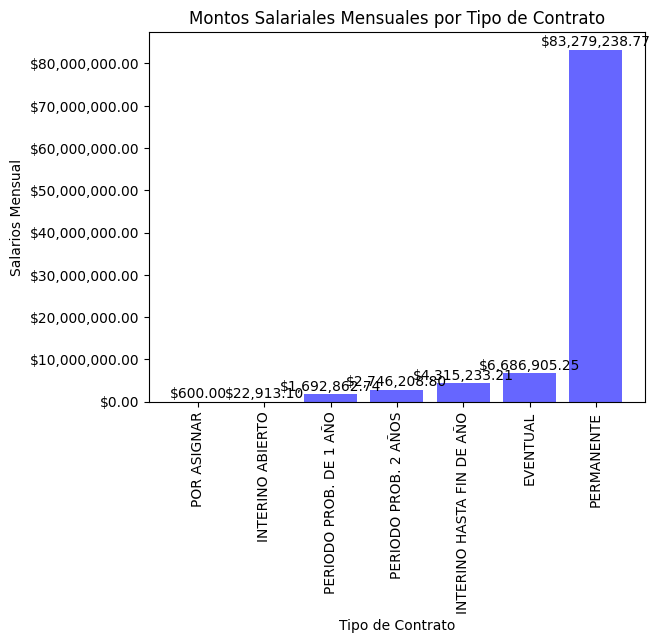

In [282]:
import locale

x = pagos_contrato['contrato']
y = pagos_contrato['Salario']

sorted_data = sorted(zip(x,y), key=lambda x: x[1])
x, y = zip(*sorted_data)

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

fig, ax = plt.subplots(figsize)

barras = ax.bar(x,y, color='blue', alpha=0.6)

ax.set_xlabel('Tipo de Contrato')
ax.set_ylabel('Salarios Mensual')

for bar, count in zip(barras, y):
    formatted_count = locale.currency(count, grouping=True)
    ax.annotate(formatted_count, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

plt.xticks(rotation=90)
plt.title('Montos Salariales Mensuales por Tipo de Contrato')

ax.get_yaxis().set_major_formatter(lambda x, p: locale.format_string('$%.2f', x, grouping=True))

plt.show()


<Axes: title={'center': 'Salario'}, xlabel='Estado'>

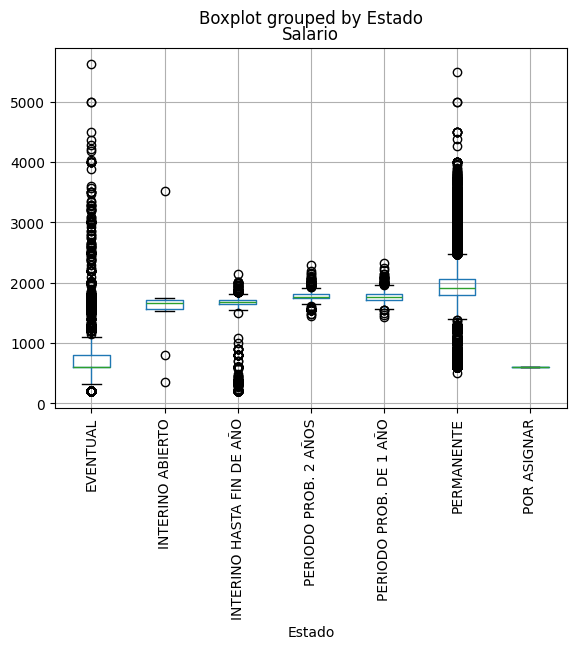

In [285]:
contratos.boxplot(column="Salario", by="Estado", rot=90)

In [291]:
contratos[contratos['Estado'] == 'INTERINO ABIERTO'].query('Salario < 1000')

Nombre    Apellido         Cédula  \
15586       DOMINGO  CONCEPCION  9-0125-001733   
33579  JOVITA ESTER       FRUTO  3-0072-001875   

                                                   Cargo  Salario  Gasto  \
15586  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...    362.5      0   
33579                      PLANIFICADOR III (SUPERVISOR)    800.0      0   

                 Estado Fecha de inicio  
15586  INTERINO ABIERTO      2001-01-01  
33579  INTERINO ABIERTO      2002-09-23

In [299]:
data = contratos[contratos['Estado'] == 'INTERINO ABIERTO']['Salario']
ax = data.plot.box()

ax.set_xticklabels(['INTERINO ABIERTO'])
plt.show()

In [302]:
contratos[contratos['Estado'] == 'INTERINO ABIERTO'][['Salario','Estado']]

Salario            Estado
5171   1719.10  INTERINO ABIERTO
11656  1531.10  INTERINO ABIERTO
15586   362.50  INTERINO ABIERTO
17228  1631.10  INTERINO ABIERTO
21819  1667.48  INTERINO ABIERTO
26913  1553.10  INTERINO ABIERTO
27314  1721.10  INTERINO ABIERTO
29844  1657.47  INTERINO ABIERTO
33579   800.00  INTERINO ABIERTO
37337  1745.60  INTERINO ABIERTO
41533  1666.60  INTERINO ABIERTO
42523  1698.10  INTERINO ABIERTO
56413  3514.25  INTERINO ABIERTO
59539  1645.60  INTERINO ABIERTO

Salario    Axes(0.125,0.11;0.775x0.77)
dtype: object

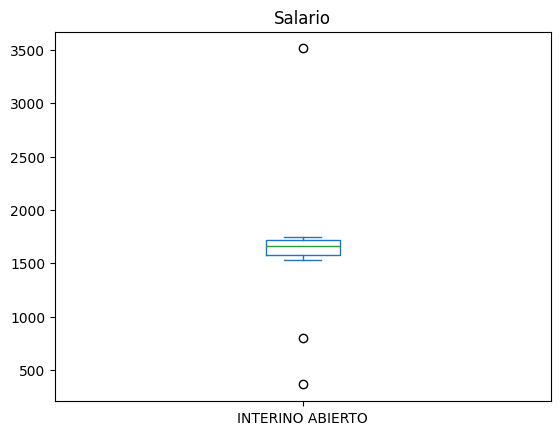

In [309]:
contratos[contratos['Estado'] == 'INTERINO ABIERTO'][['Estado','Salario']].plot.box(by='Estado')

<Axes: title={'center': 'Salario'}, xlabel='Estado'>

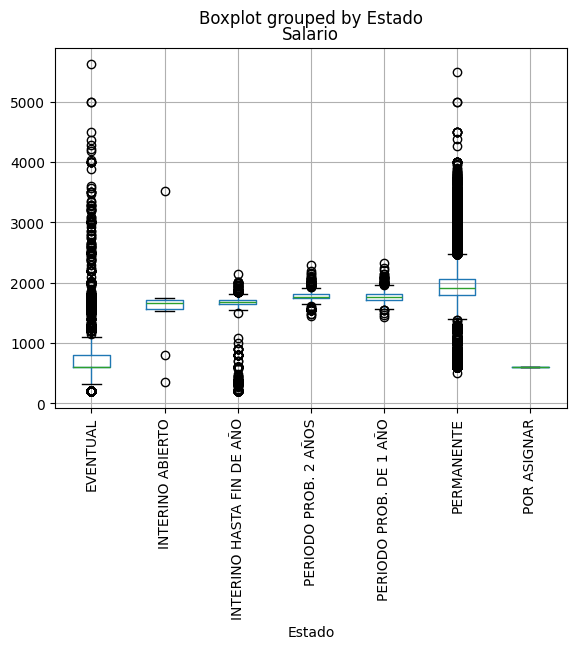

In [311]:
contratos.boxplot(column='Salario', by='Estado', rot=90)

Salario    Axes(0.125,0.11;0.775x0.77)
dtype: object

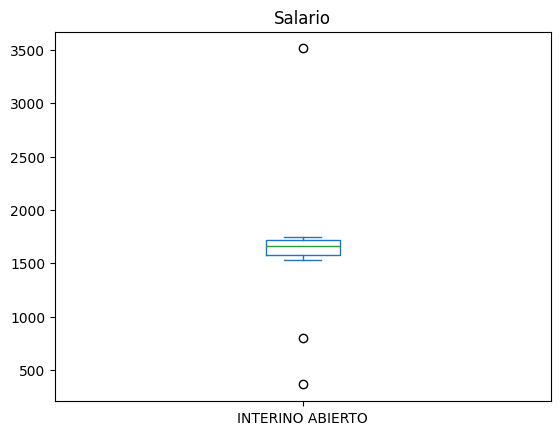

In [316]:
contratos[contratos['Estado'] == 'INTERINO ABIERTO'][['Estado','Salario']].plot.box(by='Estado')

In [324]:
import matplotlib.pyplot as plt
import locale

# Assuming 'contratos' is a DataFrame with your data
eventual_data = contratos[contratos['Estado'] == 'INTERINO ABIERTO']['Salario']
label = 'INTERINO ABIERTO'

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

fig, ax = plt.subplots()

box = ax.boxplot(eventual_data, vert=True, labels=[label])

# Calculate Q1, Q3, and IQR
Q1 = contratos[contratos['Estado'] == 'INTERINO ABIERTO']['Salario'].quantile(q=0.25)  # Lower bound of the box
Q3 = contratos[contratos['Estado'] == 'INTERINO ABIERTO']['Salario'].quantile(q=0.75)  # Upper bound of the box
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the median value from the boxplot
median_value = box['medians'][0].get_ydata()[0]

# Display the statistics on the plot
ax.text(1.1, Q1, f'Q1: {Q1:.2f}', va='center', color='blue')
ax.text(1.1, Q3, f'Q3: {Q3:.2f}', va='center', color='blue')
ax.text(1.1, Q1 + 0.1 * (Q3 - Q1), f'Q2 (Mediana): {median_value:.2f}', va='bottom', color='blue')  # Adjust the y-coordinate
ax.text(1.1, lower_bound, f'Límite Inferior: {lower_bound:.2f}', va='center', color='red')
ax.text(1.1, upper_bound, f'Límite Superior: {upper_bound:.2f}', va='center', color='red')

ax.get_yaxis().set_major_formatter(lambda x, p: locale.format_string('$%.2f', x, grouping=True))

plt.title('Boxplot')
plt.show()


In [330]:
import matplotlib.pyplot as plt
import locale

# Assuming 'contratos' is a DataFrame with your data
eventual_data = contratos[contratos['Estado'] == 'INTERINO ABIERTO']['Salario']
label = 'INTERINO ABIERTO'

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

fig, ax = plt.subplots()

box = ax.boxplot(eventual_data, vert=True, labels=[label])

# Calculate Q1, Q3, and IQR
Q1 = contratos[contratos['Estado'] == 'INTERINO ABIERTO']['Salario'].quantile(q=0.25)  # Lower bound of the box
Q3 = contratos[contratos['Estado'] == 'INTERINO ABIERTO']['Salario'].quantile(q=0.75)  # Upper bound of the box
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the median value from the boxplot
median_value = box['medians'][0].get_ydata()[0]

# Display the statistics on the plot
ax.text(1.1, Q1, f'Q1: {Q1:.2f}', va='center', ha='left', color='blue')
ax.text(1.1, Q3, f'Q3: {Q3:.2f}', va='center', ha='left', color='blue')
ax.text(0.9, Q1 + 0.1 * (Q3 - Q1), f'Q2 (Mediana): {median_value:.2f}', va='center', ha='right', color='#ff8727')  # Adjust the y-coordinate
ax.text(1.1, lower_bound, f'Límite Inferior: {lower_bound:.2f}', va='center', ha='left', color='red')
ax.text(1.1, upper_bound, f'Límite Superior: {upper_bound:.2f}', va='center', ha='left', color='red')

ax.get_yaxis().set_major_formatter(lambda x, p: locale.format_string('$%.2f', x, grouping=True))

plt.title('Boxplot')
plt.show()


In [328]:
contratos[contratos['Estado'] == 'INTERINO ABIERTO'].query('Salario > 1000')

Nombre   Apellido         Cédula  \
5171        ANTONIO     JORDAN  4-0219-000636   
11656      CRISTINA   CORONADO  3-0086-001891   
17228        EDWARD    SERRANO  4-0716-002301   
21819        EVELIA    PERALTA  5-0013-000089   
26913      HILDAURA  FERNANDEZ  5-0012-002127   
27314        IDARIA      MUNOZ  7-0118-000822   
29844  JACINTA RIOS   DE SLADE  4-0107-000135   
37337        LEYDIS  RODRIGUEZ  3-0120-000789   
41533      MARCELIA        LOO  8-0360-000534   
42523         MARIA     GARCIA  9-0707-001619   
56413          ROSA    CORDOBA  7-0084-000996   
59539        SORAYA  CABALLERO  4-0267-000072   

                                                   Cargo  Salario  Gasto  \
5171   EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1719.10      0   
11656  EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...  1531.10      0   
17228  EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...  1631.10      0   
21819  EDUCADOR D 2 (PROFESOR DE EDUCACION SEC DE 3A....  1667.48      0   
26913  EDUCADOR J 1 (MAESTRO ESC.PRIM.TIT.PROF EDUC.S...  1553.10      0   
27314  EDUCADOR N 23(PROFESOR EDUC.SEC.VOC.1RA.CAT.TI...  1721.10      0   
29844  EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...  1657.47      0   
37337  EDUCADOR F 2 (MAESTRO ESC.PRIM.TIT.UNIV LIC.ED...  1745.60      0   
41533  EDUCADOR J 1 (MAESTRO ESC.PRIM.TIT.PROF EDUC.S...  1666.60      0   
42523  EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...  1698.10      0   
56413  EDUCADOR R 1 (SUPERVISOR PROV.PRIM.O BAS TIT. ...  3514.25      0   
59539  EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...  1645.60      0   

                 Estado Fecha de inicio  
5171   INTERINO ABIERTO      2001-05-10  
11656  INTERINO ABIERTO      2006-01-24  
17228  INTERINO ABIERTO      2001-05-18  
21819  INTERINO ABIERTO      1995-08-30  
26913  INTERINO ABIERTO      1996-04-01  
27314  INTERINO ABIERTO      2000-03-23  
29844  INTERINO ABIERTO      1996-04-22  
37337  INTERINO ABIERTO      2001-04-30  
41533  INTERINO ABIERTO      2023-03-08  
42523  INTERINO ABIERTO      2001-03-05  
56413  INTERINO ABIERTO      2001-03-19  
59539  INTERINO ABIERTO      2000-05-03